# Import section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install tqdm --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 3.3 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.31.1
    Uninstalling tqdm-4.31.1:
      Successfully uninstalled tqdm-4.31.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
protobuf-compiler 1.0.20 requires tqdm==4.31.1, but you have tqdm 4.64.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()

# Load CSV files to create the Top 1M domains and their 1-2 topics database.

## Load multiple CSV files into one single DF

In [13]:
complete_export_path = "/content/drive/MyDrive/AI/topics_demo/complete_export/*/*"

In [119]:
import pandas as pd
import re

# import dataframe of CSV filenames
all_files = sorted(glob.glob(complete_export_path))
filenames_df = pd.DataFrame(all_files)
filenames_df.columns = ['raw_filenames']

# regex replace chars to go from "file0" to "file00" filename naming scheme
filenames_df['filenames_for_sort'] = filenames_df.apply(lambda row: re.sub(r'\_([0-9])\.', '_0\\1.', row['raw_filenames']), axis=1)
filenames_df.sort_values('filenames_for_sort', inplace=True, ignore_index=True)
filenames_df

# import CSVs in the correct order
# we do not specift index_col=0 in case of mismatched indexes
for index, curr_filename in tqdm(filenames_df.iterrows()):
    
  # init case
  if index == 0:
    complete_df = pd.read_csv(curr_filename['raw_filenames'])
  else:
    curr_df = pd.read_csv(curr_filename['raw_filenames'])
    complete_df = pd.concat([complete_df, curr_df])

complete_df = complete_df.loc[:, ~complete_df.columns.str.contains('^Unnamed')]
complete_df

0it [00:00, ?it/s]

,rank,domain,topic_1,topic_2
0,1,google.com,/Internet & Telecom/Search Engines,NaN
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics
4,5,netflix.com,/Arts & Entertainment/Online Video,NaN
...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing


In [120]:
complete_df

,rank,domain,topic_1,topic_2
0,1,google.com,/Internet & Telecom/Search Engines,NaN
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics
4,5,netflix.com,/Arts & Entertainment/Online Video,NaN
...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing


## Add the taxonomy number

### Complete taxonomy here (keep colapsed)

In [4]:
# Taxonomy ids and names pulled from here: https://github.com/patcg-individual-drafts/topics/blob/main/taxonomy_v1.md

cat_map = {
1: '/Arts & Entertainment',
2: '/Arts & Entertainment/Acting & Theater',
3: '/Arts & Entertainment/Comics',
4: '/Arts & Entertainment/Concerts & Music Festivals',
5: '/Arts & Entertainment/Dance',
6: '/Arts & Entertainment/Entertainment Industry',
7: '/Arts & Entertainment/Humor',
8: '/Arts & Entertainment/Humor/Live Comedy',
9: '/Arts & Entertainment/Live Sporting Events',
10: '/Arts & Entertainment/Magic',
11: '/Arts & Entertainment/Movie Listings & Theater Showtimes',
12: '/Arts & Entertainment/Movies',
13: '/Arts & Entertainment/Movies/Action & Adventure Films',
14: '/Arts & Entertainment/Movies/Animated Films',
15: '/Arts & Entertainment/Movies/Comedy Films',
16: '/Arts & Entertainment/Movies/Cult & Indie Films',
17: '/Arts & Entertainment/Movies/Documentary Films',
18: '/Arts & Entertainment/Movies/Drama Films',
19: '/Arts & Entertainment/Movies/Family Films',
20: '/Arts & Entertainment/Movies/Horror Films',
21: '/Arts & Entertainment/Movies/Romance Films',
22: '/Arts & Entertainment/Movies/Thriller, Crime & Mystery Films',
23: '/Arts & Entertainment/Music & Audio',
24: '/Arts & Entertainment/Music & Audio/Blues',
25: '/Arts & Entertainment/Music & Audio/Classical Music',
26: '/Arts & Entertainment/Music & Audio/Country Music',
27: '/Arts & Entertainment/Music & Audio/Dance & Electronic Music',
28: '/Arts & Entertainment/Music & Audio/Folk & Traditional Music',
29: '/Arts & Entertainment/Music & Audio/Jazz',
30: '/Arts & Entertainment/Music & Audio/Musical Instruments',
31: '/Arts & Entertainment/Music & Audio/Pop Music',
32: '/Arts & Entertainment/Music & Audio/Rap & Hip-Hop',
33: '/Arts & Entertainment/Music & Audio/Rock Music',
34: '/Arts & Entertainment/Music & Audio/Rock Music/Classic Rock & Oldies',
35: '/Arts & Entertainment/Music & Audio/Rock Music/Hard Rock & Progressive',
36: '/Arts & Entertainment/Music & Audio/Rock Music/Indie & Alternative Music',
37: '/Arts & Entertainment/Music & Audio/Soul & R&B',
38: '/Arts & Entertainment/Music & Audio/Soundtracks',
39: '/Arts & Entertainment/Music & Audio/Talk Radio',
40: '/Arts & Entertainment/Music & Audio/World Music',
41: '/Arts & Entertainment/Music & Audio/World Music/Reggae & Caribbean Music',
42: '/Arts & Entertainment/Online Image Galleries',
43: '/Arts & Entertainment/Online Video',
44: '/Arts & Entertainment/Opera',
45: '/Arts & Entertainment/TV Shows & Programs',
46: '/Arts & Entertainment/TV Shows & Programs/TV Comedies',
47: '/Arts & Entertainment/TV Shows & Programs/TV Documentary & Nonfiction',
48: '/Arts & Entertainment/TV Shows & Programs/TV Dramas',
49: '/Arts & Entertainment/TV Shows & Programs/TV Dramas/TV Soap Operas',
50: '/Arts & Entertainment/TV Shows & Programs/TV Family-Oriented Shows',
51: '/Arts & Entertainment/TV Shows & Programs/TV Reality Shows',
52: '/Arts & Entertainment/TV Shows & Programs/TV Sci-Fi & Fantasy Shows',
53: '/Arts & Entertainment/Visual Art & Design',
54: '/Arts & Entertainment/Visual Art & Design/Design',
55: '/Arts & Entertainment/Visual Art & Design/Painting',
56: '/Arts & Entertainment/Visual Art & Design/Photographic & Digital Arts',
57: '/Autos & Vehicles',
58: '/Autos & Vehicles/Cargo Trucks & Trailers',
59: '/Autos & Vehicles/Classic Vehicles',
60: '/Autos & Vehicles/Custom & Performance Vehicles',
61: '/Autos & Vehicles/Gas Prices & Vehicle Fueling',
62: '/Autos & Vehicles/Motor Vehicles (By Type)',
63: '/Autos & Vehicles/Motor Vehicles (By Type)/Autonomous Vehicles',
64: '/Autos & Vehicles/Motor Vehicles (By Type)/Convertibles',
65: '/Autos & Vehicles/Motor Vehicles (By Type)/Coupes',
66: '/Autos & Vehicles/Motor Vehicles (By Type)/Hatchbacks',
67: '/Autos & Vehicles/Motor Vehicles (By Type)/Hybrid & Alternative Vehicles',
68: '/Autos & Vehicles/Motor Vehicles (By Type)/Luxury Vehicles',
69: '/Autos & Vehicles/Motor Vehicles (By Type)/Microcars & Subcompacts',
70: '/Autos & Vehicles/Motor Vehicles (By Type)/Motorcycles',
71: '/Autos & Vehicles/Motor Vehicles (By Type)/Off-Road Vehicles',
72: '/Autos & Vehicles/Motor Vehicles (By Type)/Pickup Trucks',
73: '/Autos & Vehicles/Motor Vehicles (By Type)/Scooters & Mopeds',
74: '/Autos & Vehicles/Motor Vehicles (By Type)/Sedans',
75: '/Autos & Vehicles/Motor Vehicles (By Type)/Station Wagons',
76: '/Autos & Vehicles/Motor Vehicles (By Type)/SUVs & Crossovers',
77: '/Autos & Vehicles/Motor Vehicles (By Type)/SUVs & Crossovers/Crossovers',
78: '/Autos & Vehicles/Motor Vehicles (By Type)/Vans & Minivans',
79: '/Autos & Vehicles/Towing & Roadside Assistance',
80: '/Autos & Vehicles/Vehicle & Traffic Safety',
81: '/Autos & Vehicles/Vehicle Parts & Accessories',
82: '/Autos & Vehicles/Vehicle Repair & Maintenance',
83: '/Autos & Vehicles/Vehicle Shopping',
84: '/Autos & Vehicles/Vehicle Shopping/Used Vehicles',
85: '/Autos & Vehicles/Vehicle Shows',
86: '/Beauty & Fitness',
87: '/Beauty & Fitness/Body Art',
88: '/Beauty & Fitness/Face & Body Care',
89: '/Beauty & Fitness/Face & Body Care/Antiperspirants, Deodorants & Body Sprays',
90: '/Beauty & Fitness/Face & Body Care/Bath & Body Products',
91: '/Beauty & Fitness/Face & Body Care/Clean Beauty',
92: '/Beauty & Fitness/Face & Body Care/Make-Up & Cosmetics',
93: '/Beauty & Fitness/Face & Body Care/Nail Care Products',
94: '/Beauty & Fitness/Face & Body Care/Perfumes & Fragrances',
95: '/Beauty & Fitness/Face & Body Care/Razors & Shavers',
96: '/Beauty & Fitness/Fashion & Style',
97: '/Beauty & Fitness/Fitness',
98: '/Beauty & Fitness/Fitness/Bodybuilding',
99: '/Beauty & Fitness/Hair Care',
100: '/Books & Literature',
101: '/Books & Literature/Childrens Literature',
102: '/Books & Literature/Poetry',
103: '/Business & Industrial',
104: '/Business & Industrial/Advertising & Marketing',
105: '/Business & Industrial/Advertising & Marketing/Sales',
106: '/Business & Industrial/Agriculture & Forestry',
107: '/Business & Industrial/Agriculture & Forestry/Food Production',
108: '/Business & Industrial/Automotive Industry',
109: '/Business & Industrial/Aviation Industry',
110: '/Business & Industrial/Business Operations',
111: '/Business & Industrial/Business Operations/Flexible Work Arrangements',
112: '/Business & Industrial/Business Operations/Human Resources',
113: '/Business & Industrial/Commercial Lending',
114: '/Business & Industrial/Construction & Maintenance',
115: '/Business & Industrial/Construction & Maintenance/Civil Engineering',
116: '/Business & Industrial/Defense Industry',
117: '/Business & Industrial/Energy & Utilities',
118: '/Business & Industrial/Energy & Utilities/Water Supply & Treatment',
119: '/Business & Industrial/Hospitality Industry',
120: '/Business & Industrial/Manufacturing',
121: '/Business & Industrial/Metals & Mining',
122: '/Business & Industrial/Pharmaceuticals & Biotech',
123: '/Business & Industrial/Printing & Publishing',
124: '/Business & Industrial/Retail Trade',
125: '/Business & Industrial/Venture Capital',
126: '/Computers & Electronics',
127: '/Computers & Electronics/Antivirus & Malware',
128: '/Computers & Electronics/Computer Peripherals',
129: '/Computers & Electronics/Consumer Electronics',
130: '/Computers & Electronics/Consumer Electronics/Cameras & Camcorders',
131: '/Computers & Electronics/Consumer Electronics/Home Automation',
132: '/Computers & Electronics/Consumer Electronics/Home Theater Systems',
133: '/Computers & Electronics/Consumer Electronics/Wearable Technology',
134: '/Computers & Electronics/Desktop Computers',
135: '/Computers & Electronics/Laptops & Notebooks',
136: '/Computers & Electronics/Network Security',
137: '/Computers & Electronics/Networking',
138: '/Computers & Electronics/Networking/Distributed & Cloud Computing',
139: '/Computers & Electronics/Programming',
140: '/Computers & Electronics/Software',
141: '/Computers & Electronics/Software/Audio & Music Software',
142: '/Computers & Electronics/Software/Desktop Publishing',
143: '/Computers & Electronics/Software/Freeware & Shareware',
144: '/Computers & Electronics/Software/Graphics & Animation Software',
145: '/Computers & Electronics/Software/Operating Systems',
146: '/Computers & Electronics/Software/Photo Software',
147: '/Computers & Electronics/Software/Video Software',
148: '/Computers & Electronics/Software/Web Browsers',
149: '/Finance',
150: '/Finance/Accounting & Auditing',
151: '/Finance/Accounting & Auditing/Tax Preparation & Planning',
152: '/Finance/Credit Cards',
153: '/Finance/Financial Planning & Management',
154: '/Finance/Financial Planning & Management/Retirement & Pension',
155: '/Finance/Grants, Scholarships & Financial Aid',
156: '/Finance/Grants, Scholarships & Financial Aid/Study Grants & Scholarships',
157: '/Finance/Home Financing',
158: '/Finance/Insurance',
159: '/Finance/Insurance/Auto Insurance',
160: '/Finance/Insurance/Health Insurance',
161: '/Finance/Insurance/Home Insurance',
162: '/Finance/Insurance/Life Insurance',
163: '/Finance/Insurance/Travel Insurance',
164: '/Finance/Investing',
165: '/Finance/Investing/Commodities & Futures Trading',
166: '/Finance/Investing/Currencies & Foreign Exchange',
167: '/Finance/Investing/Hedge Funds',
168: '/Finance/Investing/Mutual Funds',
169: '/Finance/Investing/Stocks & Bonds',
170: '/Finance/Personal Loans',
171: '/Finance/Student Loans & College Financing',
172: '/Food & Drink',
173: '/Food & Drink/Cooking & Recipes',
174: '/Food & Drink/Cooking & Recipes/BBQ & Grilling',
175: '/Food & Drink/Cooking & Recipes/Cuisines',
176: '/Food & Drink/Cooking & Recipes/Cuisines/Vegetarian Cuisine',
177: '/Food & Drink/Cooking & Recipes/Cuisines/Vegetarian Cuisine/Vegan Cuisine',
178: '/Food & Drink/Cooking & Recipes/Healthy Eating',
179: '/Food & Drink/Food & Grocery Retailers',
180: '/Games',
181: '/Games/Billiards',
182: '/Games/Card Games',
183: '/Games/Computer & Video Games',
184: '/Games/Computer & Video Games/Action & Platform Games',
185: '/Games/Computer & Video Games/Adventure Games',
186: '/Games/Computer & Video Games/Casual Games',
187: '/Games/Computer & Video Games/Competitive Video Gaming',
188: '/Games/Computer & Video Games/Massively Multiplayer Games',
189: '/Games/Computer & Video Games/Music & Dance Games',
190: '/Games/Computer & Video Games/Simulation Games',
191: '/Games/Computer & Video Games/Sports Games',
192: '/Games/Computer & Video Games/Strategy Games',
193: '/Games/Drawing & Coloring',
194: '/Games/Roleplaying Games',
195: '/Games/Table Tennis',
196: '/Hobbies & Leisure',
197: '/Hobbies & Leisure/Anniversaries',
198: '/Hobbies & Leisure/Birthdays & Name Days',
199: '/Hobbies & Leisure/Diving & Underwater Activities',
200: '/Hobbies & Leisure/Fiber & Textile Arts',
201: '/Hobbies & Leisure/Outdoors',
202: '/Hobbies & Leisure/Outdoors/Fishing',
203: '/Hobbies & Leisure/Outdoors/Hunting & Shooting',
204: '/Hobbies & Leisure/Paintball',
205: '/Hobbies & Leisure/Radio Control & Modeling',
206: '/Hobbies & Leisure/Weddings',
207: '/Home & Garden',
208: '/Home & Garden/Gardening',
209: '/Home & Garden/Home & Interior Decor',
210: '/Home & Garden/Home Appliances',
211: '/Home & Garden/Home Improvement',
212: '/Home & Garden/Home Safety & Security',
213: '/Home & Garden/Household Supplies',
214: '/Home & Garden/Landscape Design',
215: '/Internet & Telecom',
216: '/Internet & Telecom/Email',
217: '/Internet & Telecom/ISPs',
218: '/Internet & Telecom/Phone Service Providers',
219: '/Internet & Telecom/Search Engines',
220: '/Internet & Telecom/Smart Phones',
221: '/Internet & Telecom/Teleconferencing',
222: '/Internet & Telecom/Text & Instant Messaging',
223: '/Internet & Telecom/Web Apps & Online Tools',
224: '/Internet & Telecom/Web Design & Development',
225: '/Internet & Telecom/Web Hosting',
226: '/Jobs & Education',
227: '/Jobs & Education/Education',
228: '/Jobs & Education/Education/Academic Conferences & Publications',
229: '/Jobs & Education/Education/Colleges & Universities',
230: '/Jobs & Education/Education/Distance Learning',
231: '/Jobs & Education/Education/Early Childhood Education',
232: '/Jobs & Education/Education/Early Childhood Education/Preschool',
233: '/Jobs & Education/Education/Homeschooling',
234: '/Jobs & Education/Education/Standardized & Admissions Tests',
235: '/Jobs & Education/Education/Vocational & Continuing Education',
236: '/Jobs & Education/Jobs',
237: '/Jobs & Education/Jobs/Career Resources & Planning',
238: '/Jobs & Education/Jobs/Job Listings',
239: '/Law & Government',
240: '/Law & Government/Crime & Justice',
241: '/Law & Government/Legal',
242: '/Law & Government/Legal/Legal Services',
243: '/News',
244: '/News/Economy News',
245: '/News/Local News',
246: '/News/Mergers & Acquisitions',
247: '/News/Politics',
248: '/News/Weather',
249: '/News/World News',
250: '/Online Communities',
251: '/Online Communities/Dating & Personals',
252: '/Online Communities/Forum & Chat Providers',
253: '/Online Communities/Social Networks',
254: '/People & Society',
255: '/People & Society/Family & Relationships',
256: '/People & Society/Family & Relationships/Ancestry & Genealogy',
257: '/People & Society/Family & Relationships/Marriage',
258: '/People & Society/Family & Relationships/Parenting',
259: '/People & Society/Family & Relationships/Parenting/Adoption',
260: '/People & Society/Family & Relationships/Parenting/Babies & Toddlers',
261: '/People & Society/Family & Relationships/Parenting/Child Internet Safety',
262: '/People & Society/Science Fiction & Fantasy',
263: '/Pets & Animals',
264: '/Pets & Animals/Pet Food & Pet Care Supplies',
265: '/Pets & Animals/Pets',
266: '/Pets & Animals/Pets/Birds',
267: '/Pets & Animals/Pets/Cats',
268: '/Pets & Animals/Pets/Dogs',
269: '/Pets & Animals/Pets/Fish & Aquaria',
270: '/Pets & Animals/Pets/Reptiles & Amphibians',
271: '/Pets & Animals/Veterinarians',
272: '/Real Estate',
273: '/Real Estate/Lots & Land',
274: '/Real Estate/Timeshares & Vacation Properties',
275: '/Reference',
276: '/Reference/Educational Resources',
277: '/Reference/Foreign Language Study',
278: '/Reference/How-To, DIY & Expert Content',
279: '/Science',
280: '/Science/Augmented & Virtual Reality',
281: '/Science/Biological Sciences',
282: '/Science/Biological Sciences/Genetics',
283: '/Science/Chemistry',
284: '/Science/Ecology & Environment',
285: '/Science/Geology',
286: '/Science/Machine Learning & Artificial Intelligence',
287: '/Science/Physics',
288: '/Science/Robotics',
289: '/Shopping',
290: '/Shopping/Antiques & Collectibles',
291: '/Shopping/Childrens Clothing',
292: '/Shopping/Consumer Resources',
293: '/Shopping/Consumer Resources/Coupons & Discount Offers',
294: '/Shopping/Costumes',
295: '/Shopping/Flowers',
296: '/Shopping/Mens Clothing',
297: '/Shopping/Party & Holiday Supplies',
298: '/Shopping/Womens Clothing',
299: '/Sports',
300: '/Sports/American Football',
301: '/Sports/Australian Football',
302: '/Sports/Auto Racing',
303: '/Sports/Baseball',
304: '/Sports/Basketball',
305: '/Sports/Bowling',
306: '/Sports/Boxing',
307: '/Sports/Cheerleading',
308: '/Sports/College Sports',
309: '/Sports/Cricket',
310: '/Sports/Cycling',
311: '/Sports/Equestrian',
312: '/Sports/Extreme Sports',
313: '/Sports/Extreme Sports/Climbing & Mountaineering',
314: '/Sports/Fantasy Sports',
315: '/Sports/Golf',
316: '/Sports/Gymnastics',
317: '/Sports/Hockey',
318: '/Sports/Ice Skating',
319: '/Sports/Martial Arts',
320: '/Sports/Motorcycle Racing',
321: '/Sports/Olympics',
322: '/Sports/Rugby',
323: '/Sports/Running & Walking',
324: '/Sports/Skiing & Snowboarding',
325: '/Sports/Soccer',
326: '/Sports/Surfing',
327: '/Sports/Swimming',
328: '/Sports/Tennis',
329: '/Sports/Track & Field',
330: '/Sports/Volleyball',
331: '/Sports/Wrestling',
332: '/Travel & Transportation',
333: '/Travel & Transportation/Adventure Travel',
334: '/Travel & Transportation/Air Travel',
335: '/Travel & Transportation/Business Travel',
336: '/Travel & Transportation/Car Rentals',
337: '/Travel & Transportation/Cruises & Charters',
338: '/Travel & Transportation/Family Travel',
339: '/Travel & Transportation/Honeymoons & Romantic Getaways',
340: '/Travel & Transportation/Hotels & Accommodations',
341: '/Travel & Transportation/Long Distance Bus & Rail',
342: '/Travel & Transportation/Low Cost & Last Minute Travel',
343: '/Travel & Transportation/Luggage & Travel Accessories',
344: '/Travel & Transportation/Tourist Destinations',
345: '/Travel & Transportation/Tourist Destinations/Beaches & Islands',
346: '/Travel & Transportation/Tourist Destinations/Regional Parks & Gardens',
347: '/Travel & Transportation/Tourist Destinations/Theme Parks',
348: '/Travel & Transportation/Tourist Destinations/Zoos, Aquariums & Preserves',
349: '/Travel & Transportation/Travel Guides & Travelogues',
-2: 'Unknown'
}

### Apply taxonomy indexes to main DF - Detail Empty Topic Definition

There are several cases of empty topics:  

*  The empty string value : will be discarded to only get `value_not_provided`
*  `value_not_provided` means that the ClassifierNN did not infer a topic for this domain
*  `taxonomy_404` means that the inferred topic is not part of the "complete" taxonomy => we will try to understand what is in this group and migrate to `value_not_provided` if possible
*  `Unknown` is a value inferred by the ClassifierNN and is a valid taxonomy, so we should not try to convert it.

In [171]:
sample_complete_df = complete_df.head()

# add empty field as ID 0 in taxonomy dict
modified_cat_map_that_includes_empty_topics = cat_map
modified_cat_map_that_includes_empty_topics[0] = ''
modified_cat_map_that_includes_empty_topics[-1] = 'value_not_provided'

# use modified taxonomy to match with ID (or write 404 message)
def convert_topic_to_id(input_topic):
  id_or_empty_array = [key for key, value in modified_cat_map_that_includes_empty_topics.items() if value == input_topic]
  if len(id_or_empty_array):
    return id_or_empty_array[0]
  else:
    return 'taxonomy_404'

sample_complete_df['test_topic_1'] = sample_complete_df.progress_apply(lambda row: convert_topic_to_id(row['topic_1']), axis=1)
sample_complete_df['test_topic_2'] = sample_complete_df.progress_apply(lambda row: convert_topic_to_id(row['topic_2']), axis=1)
sample_complete_df

  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-171-2b7dff6dfeef>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_complete_df['test_topic_1'] = sample_complete_df.progress_apply(lambda row: convert_topic_to_id(row['topic_1']), axis=1)


  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-171-2b7dff6dfeef>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_complete_df['test_topic_2'] = sample_complete_df.progress_apply(lambda row: convert_topic_to_id(row['topic_2']), axis=1)


,rank,domain,topic_1,topic_2,test_topic_1,test_topic_2
0,1,google.com,/Internet & Telecom/Search Engines,value_not_provided,219,-1
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,215,219
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,129,140
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,140,126
4,5,netflix.com,/Arts & Entertainment/Online Video,value_not_provided,43,-1


In [175]:
# clean and convert topic features to string type for faster operations
complete_df['topic_1'] = complete_df['topic_1'].fillna('value_not_provided')
complete_df['topic_1'] = complete_df['topic_1'].astype("string")

complete_df['topic_2'] = complete_df['topic_2'].fillna('value_not_provided')
complete_df['topic_2'] = complete_df['topic_2'].astype("string")


# add keys to main DF -- list comprehension in lambdas to get a quick result
# legacy technique
# complete_df['t1_key'] = complete_df.progress_apply(lambda row: next(key for key, value in modified_cat_map_that_includes_empty_topics.items() if value == row['topic_1']), axis=1)
# complete_df['t2_key'] = complete_df.progress_apply(lambda row: next(key for key, value in modified_cat_map_that_includes_empty_topics.items() if value == row['topic_2']), axis=1)

# new technique: add 'taxonomy_404' in the event of Not Found taxonomy -- LEGACY AS WELL
# complete_df['t1_key'] = complete_df.progress_apply(lambda row: [key if value == row['topic_1'] else 'taxonomy_404' for key, value in modified_cat_map_that_includes_empty_topics.items()], axis=1)
# complete_df['t2_key'] = complete_df.progress_apply(lambda row: [key if value == row['topic_2'] else 'taxonomy_404' for key, value in modified_cat_map_that_includes_empty_topics.items()], axis=1)

# new new technique: define a simple function instead of a complex list comprehension
complete_df['t1_key'] = complete_df.progress_apply(lambda row: convert_topic_to_id(row['topic_1']), axis=1)
complete_df['t2_key'] = complete_df.progress_apply(lambda row: convert_topic_to_id(row['topic_2']), axis=1)
complete_df

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

,rank,domain,topic_1,topic_2,t1_key,t2_key
0,1,google.com,/Internet & Telecom/Search Engines,value_not_provided,219,-1
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,215,219
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,129,140
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,140,126
4,5,netflix.com,/Arts & Entertainment/Online Video,value_not_provided,43,-1
...,...,...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement,207,211
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles,83,57
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom,104,215
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing,1,104


## BACKUP - Save the DF to a complete CSV

In [176]:
complete_df.to_csv('/content/drive/MyDrive/AI/topics_demo/datasets/top1m_complete/complete_df.csv')

In [3]:
complete_df = pd.read_csv('/content/drive/MyDrive/AI/topics_demo/datasets/top1m_complete/complete_df.csv', sep=',', header=0, index_col=0)
complete_df

,rank,domain,topic_1,topic_2,t1_key,t2_key
0,1,google.com,/Internet & Telecom/Search Engines,value_not_provided,219,-1
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,215,219
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,129,140
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,140,126
4,5,netflix.com,/Arts & Entertainment/Online Video,value_not_provided,43,-1
...,...,...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement,207,211
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles,83,57
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom,104,215
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing,1,104


# Explore Dataset

## Hist plots of simple topics

We count the simple topics and show a histplot of counts in a linear scale, then a second time in a log scale.  

We see that simple topics are mostly "Unknown", with some 5-10 topics being the most represented by far (+100k counts of delta).  

On a log scale, we can see a simple decreasing distribution showing that most simple topics are represented but their counts vary exponentially.  



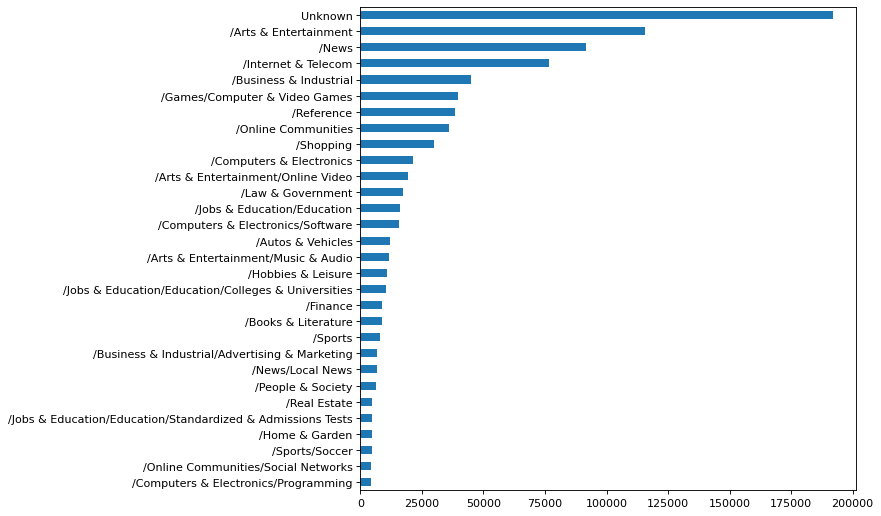

In [199]:
import matplotlib.pyplot as plt

length_dpi = 8
height_dpi = 8

figure(figsize=(length_dpi, height_dpi), dpi=80)
complete_df.topic_1.value_counts().head(30).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

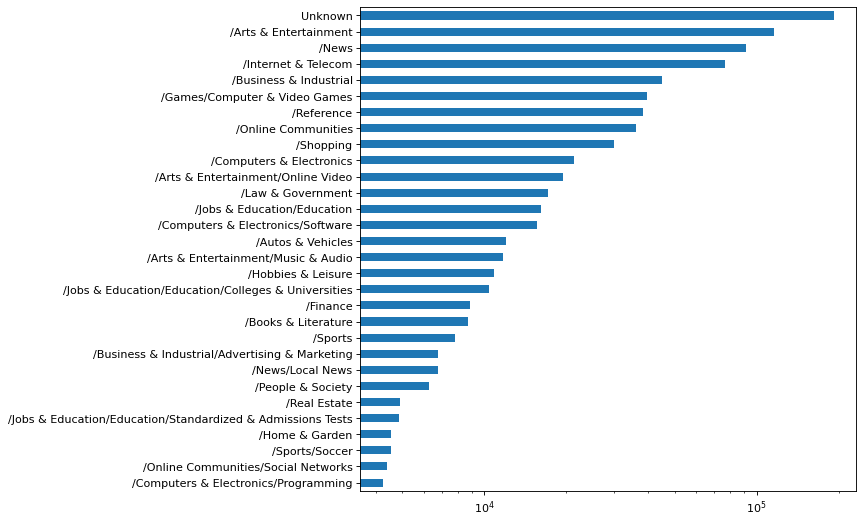

In [200]:
figure(figsize=(length_dpi, height_dpi), dpi=80)
complete_df.topic_1.value_counts().head(30).plot(kind="barh", logx=True)
plt.gca().invert_yaxis()
plt.show()

## Heatmap and cluster map of simple topics

How much empty space is there in the topic taxonomy space, and where are located the samples ?

In [5]:
import seaborn as sns

complete_df['unitary_counter'] = 1
keys_df = complete_df[['t1_key', 't2_key', 'unitary_counter']]
heatmap_keys_df = keys_df.pivot_table(values='unitary_counter', index='t1_key', columns='t2_key', aggfunc='sum', fill_value=0)

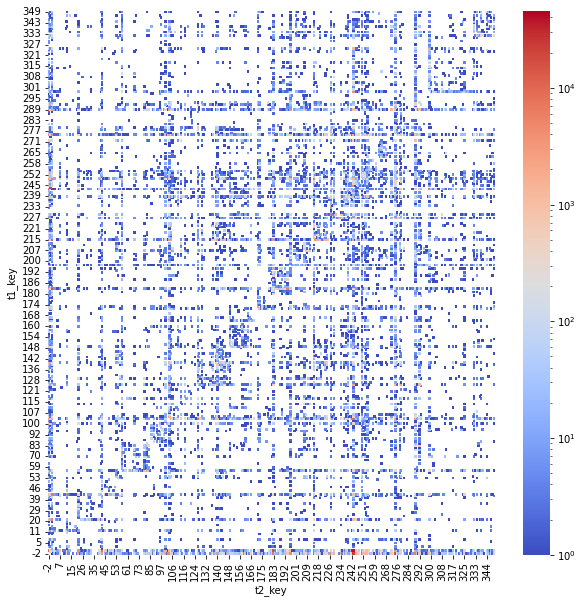

In [208]:
from matplotlib.colors import LogNorm, Normalize


fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
# sns.heatmap(heatmap_df, annot=True, linewidths=.5, ax=ax)
sns.heatmap(heatmap_keys_df, ax=ax, cmap="coolwarm", norm=LogNorm())
ax.invert_yaxis()

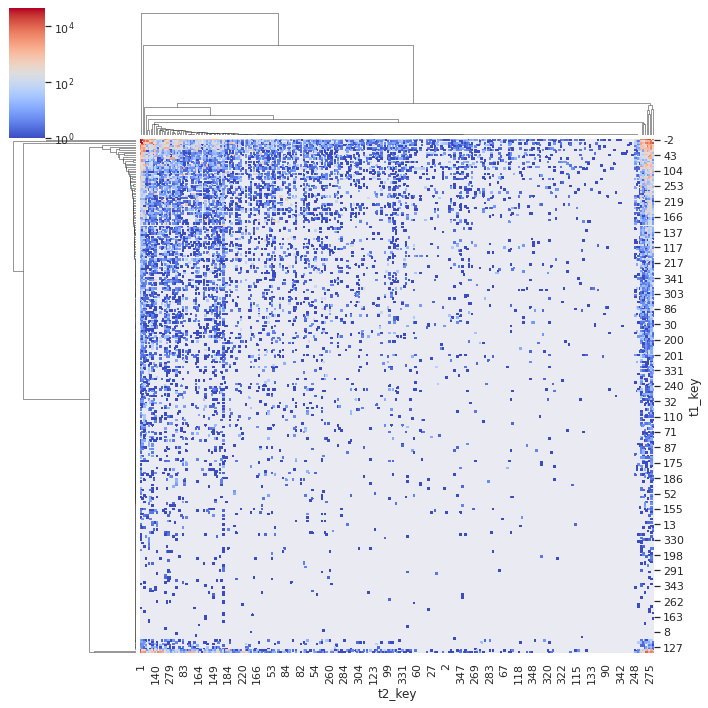

In [41]:
# fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
# sns.heatmap(heatmap_df, annot=True, linewidths=.5, ax=ax)
sns.clustermap(heatmap_keys_df, cmap="coolwarm", norm=LogNorm())
# ax.invert_yaxis()

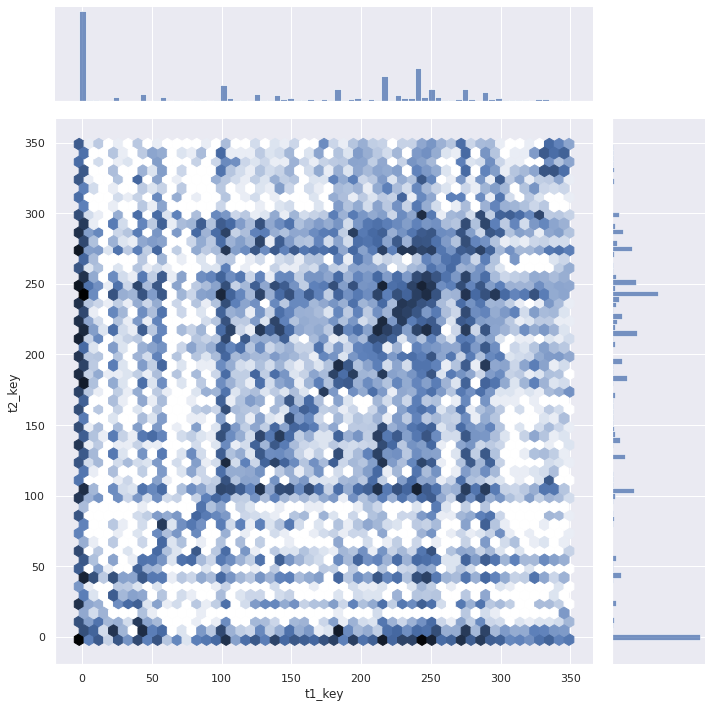

In [51]:
from matplotlib.colors import LogNorm, Normalize


# sns.set(rc={'figure.figsize':(50, 50)})

sample_df = keys_df.sample(len(keys_df))
sample_df = sample_df.reset_index(drop=True)
sns.jointplot(data=sample_df, x='t1_key', y='t2_key', kind="hex", norm=LogNorm(), height=10)
plt.show()

## Aggregated Taxonomy categories

We will now extract the higher-order taxonomy categories.  
Each taxonomy is written in the format "/category/subcategory", which allows to extract only the highest category.  

We will run this process two times: first to create a new taxonomy, second, to extract the information from `complete_df`.

In [5]:
modified_cat_map_that_includes_empty_topics = cat_map
modified_cat_map_that_includes_empty_topics[0] = ''
modified_cat_map_that_includes_empty_topics[-1] = 'value_not_provided'

def get_topic_category(topic):
  split_item = topic.split('/')
  if len(split_item) == 1:
    return split_item[0]

  return split_item[1]
    

# extract taxonomy categories from original taxonomy
new_taxonomy = []
for index,topic in modified_cat_map_that_includes_empty_topics.items():
  new_taxonomy.append(get_topic_category(topic))

# convert to dictionnary with int index
cat_taxonomy = {}
for index,taxonomy_category in enumerate(sorted(list(set(new_taxonomy)))):
  cat_taxonomy[index] = taxonomy_category
cat_taxonomy

{0: '',
 1: 'Arts & Entertainment',
 2: 'Autos & Vehicles',
 3: 'Beauty & Fitness',
 4: 'Books & Literature',
 5: 'Business & Industrial',
 6: 'Computers & Electronics',
 7: 'Finance',
 8: 'Food & Drink',
 9: 'Games',
 10: 'Hobbies & Leisure',
 11: 'Home & Garden',
 12: 'Internet & Telecom',
 13: 'Jobs & Education',
 14: 'Law & Government',
 15: 'News',
 16: 'Online Communities',
 17: 'People & Society',
 18: 'Pets & Animals',
 19: 'Real Estate',
 20: 'Reference',
 21: 'Science',
 22: 'Shopping',
 23: 'Sports',
 24: 'Travel & Transportation',
 25: 'Unknown',
 26: 'value_not_provided'}

In [7]:
# move to new dataframe and remove useless features
cat_complete_df = complete_df.copy(deep=True)
del cat_complete_df['t1_key']
del cat_complete_df['t2_key']
# del cat_complete_df['unitary_counter']
# del cat_complete_df['rank']

# extract categories for topics 1 & 2
cat_complete_df['cat_1'] = cat_complete_df.progress_apply(lambda row: get_topic_category(row['topic_1']), axis=1)
cat_complete_df['cat_2'] = cat_complete_df.progress_apply(lambda row: get_topic_category(row['topic_2']), axis=1)
cat_complete_df

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

,rank,domain,topic_1,topic_2,cat_1,cat_2
0,1,google.com,/Internet & Telecom/Search Engines,value_not_provided,Internet & Telecom,value_not_provided
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,Internet & Telecom,Internet & Telecom
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,Computers & Electronics,Computers & Electronics
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,Computers & Electronics,Computers & Electronics
4,5,netflix.com,/Arts & Entertainment/Online Video,value_not_provided,Arts & Entertainment,value_not_provided
...,...,...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement,Home & Garden,Home & Garden
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles,Autos & Vehicles,Autos & Vehicles
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom,Business & Industrial,Internet & Telecom
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing,Arts & Entertainment,Business & Industrial


In [8]:
# use modified taxonomy to match with ID (or write 404 message)
def convert_category_to_id(input_topic):
  id_or_empty_array = [key for key, value in cat_taxonomy.items() if value == input_topic]
  if len(id_or_empty_array):
    return id_or_empty_array[0]
  else:
    return 'taxonomy_404'

cat_complete_df['kcat_1'] = cat_complete_df.progress_apply(lambda row: convert_category_to_id(row['cat_1']), axis=1)
cat_complete_df['kcat_2'] = cat_complete_df.progress_apply(lambda row: convert_category_to_id(row['cat_2']), axis=1)
cat_complete_df

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

,rank,domain,topic_1,topic_2,cat_1,cat_2,kcat_1,kcat_2
0,1,google.com,/Internet & Telecom/Search Engines,value_not_provided,Internet & Telecom,value_not_provided,12,26
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,Internet & Telecom,Internet & Telecom,12,12
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,Computers & Electronics,Computers & Electronics,6,6
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,Computers & Electronics,Computers & Electronics,6,6
4,5,netflix.com,/Arts & Entertainment/Online Video,value_not_provided,Arts & Entertainment,value_not_provided,1,26
...,...,...,...,...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement,Home & Garden,Home & Garden,11,11
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles,Autos & Vehicles,Autos & Vehicles,2,2
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom,Business & Industrial,Internet & Telecom,5,12
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing,Arts & Entertainment,Business & Industrial,1,5


### Backup time !

In [9]:
cat_complete_df.to_csv('/content/drive/MyDrive/AI/topics_demo/datasets/top1m_complete/cat_complete_df.csv')

In [33]:
cat_complete_df = pd.read_csv('/content/drive/MyDrive/AI/topics_demo/datasets/top1m_complete/cat_complete_df.csv', sep=',', header=0, index_col=0)
cat_complete_df

,rank,domain,topic_1,topic_2,cat_1,cat_2,kcat_1,kcat_2
0,1,google.com,/Internet & Telecom/Search Engines,value_not_provided,Internet & Telecom,value_not_provided,12,26
1,2,www.google.com,/Internet & Telecom,/Internet & Telecom/Search Engines,Internet & Telecom,Internet & Telecom,12,12
2,3,microsoft.com,/Computers & Electronics/Consumer Electronics,/Computers & Electronics/Software,Computers & Electronics,Computers & Electronics,6,6
3,4,data.microsoft.com,/Computers & Electronics/Software,/Computers & Electronics,Computers & Electronics,Computers & Electronics,6,6
4,5,netflix.com,/Arts & Entertainment/Online Video,value_not_provided,Arts & Entertainment,value_not_provided,1,26
...,...,...,...,...,...,...,...,...
9995,999996,acuityeyecaregroup.com,/Home & Garden,/Home & Garden/Home Improvement,Home & Garden,Home & Garden,11,11
9996,999997,acuracertified.com,/Autos & Vehicles/Vehicle Shopping,/Autos & Vehicles,Autos & Vehicles,Autos & Vehicles,2,2
9997,999998,ad.dyntracker.de,/Business & Industrial/Advertising & Marketing,/Internet & Telecom,Business & Industrial,Internet & Telecom,5,12
9998,999999,ad.mediaprimaplus.com.my.cdn.cloudflare.net,/Arts & Entertainment,/Business & Industrial/Advertising & Marketing,Arts & Entertainment,Business & Industrial,1,5


## Hist plots of category topics

We have extracted topic categories out of our simple topics.  

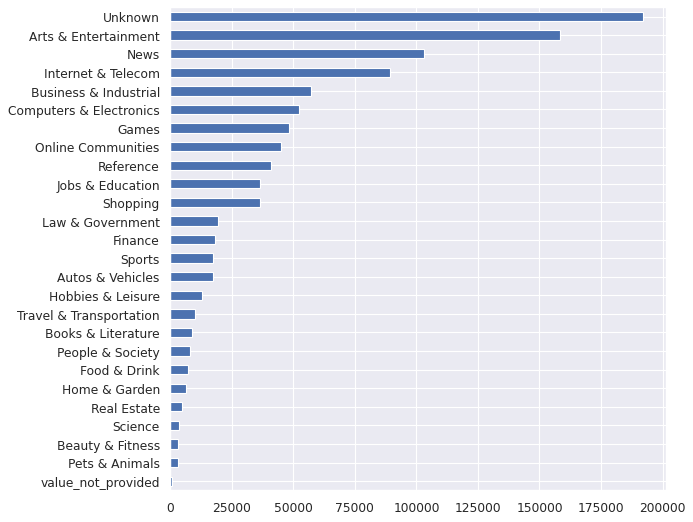

In [90]:
import matplotlib.pyplot as plt

length_dpi = 8
height_dpi = 8

figure(figsize=(length_dpi, height_dpi), dpi=80)
cat_complete_df.cat_1.value_counts().head(30).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

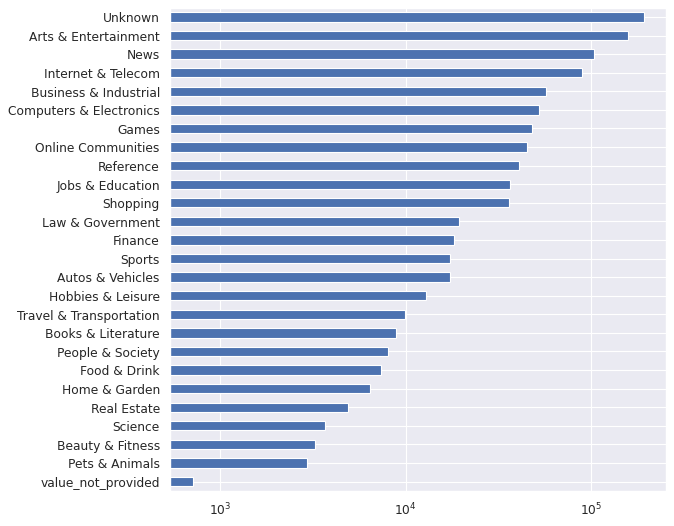

In [91]:
figure(figsize=(length_dpi, height_dpi), dpi=80)
cat_complete_df.cat_1.value_counts().head(30).plot(kind="barh", logx=True)
plt.gca().invert_yaxis()
plt.show()

## Heatmap and cluster map of category topics

How much empty space is there in the topic category space, and where are located the samples ?

### Simple unary aggregation

In [34]:
import seaborn as sns

cat_complete_df['unitary_counter'] = 1
cat_keys_df = cat_complete_df[['kcat_1', 'kcat_2', 'unitary_counter']]
heatmap_cat_keys_df = cat_keys_df.pivot_table(values='unitary_counter', index='kcat_1', columns='kcat_2', aggfunc='sum', fill_value=0)

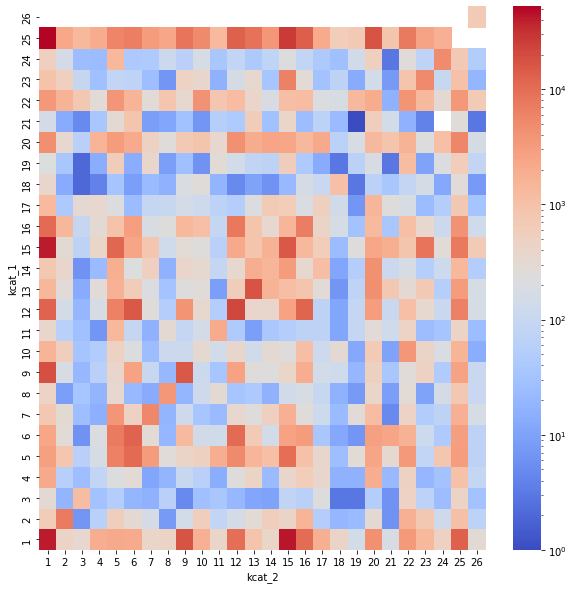

In [35]:
from matplotlib.colors import LogNorm, Normalize


fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
# sns.heatmap(heatmap_df, annot=True, linewidths=.5, ax=ax)
sns.heatmap(heatmap_cat_keys_df, ax=ax, cmap="coolwarm", norm=LogNorm())
ax.invert_yaxis()

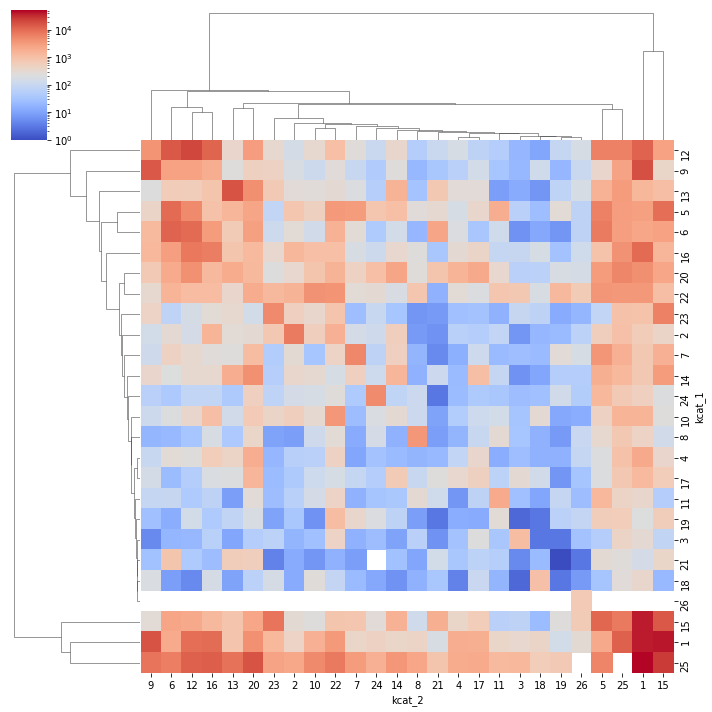

In [36]:
sns.clustermap(heatmap_cat_keys_df, cmap="coolwarm", norm=LogNorm())

### Rank aggregation

Instead of considering each domain as the value 1, we sum all ranks inside each cell and compare the results.  

In [ ]:
cat_complete_df["rank"] = cat_complete_df['rank'].max() - cat_complete_df["rank"]
cat_complete_df

In [38]:
import seaborn as sns

cat_keys_df = cat_complete_df[['kcat_1', 'kcat_2', 'rank']]
heatmap_cat_keys_df = cat_keys_df.pivot_table(values='rank', index='kcat_1', columns='kcat_2', aggfunc='sum', fill_value=0)

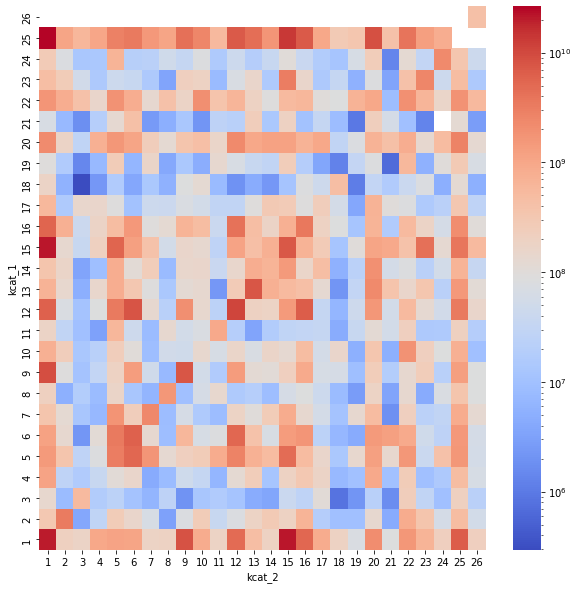

In [42]:
from matplotlib.colors import LogNorm, Normalize


fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
# sns.heatmap(heatmap_df, annot=True, linewidths=.5, ax=ax)
sns.heatmap(heatmap_cat_keys_df, ax=ax, cmap="coolwarm", norm=LogNorm())
ax.invert_yaxis()

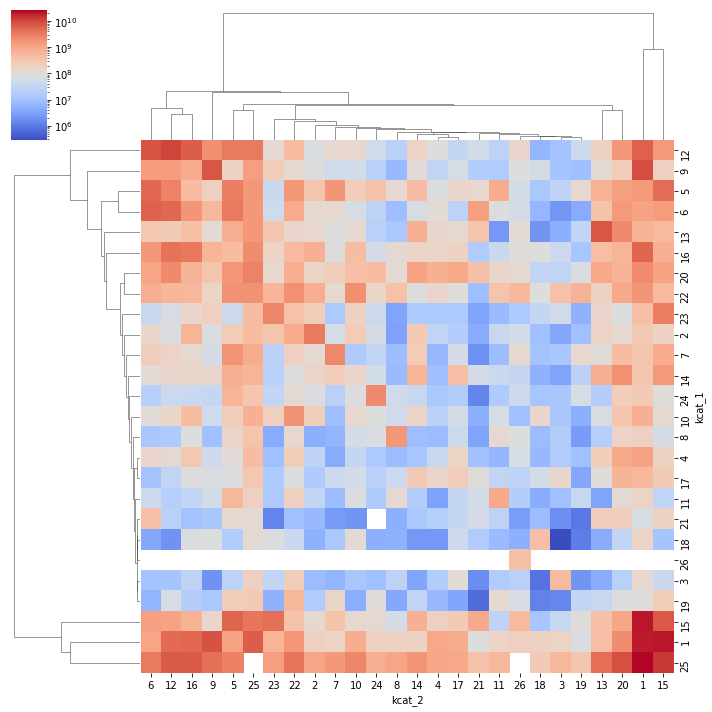

In [43]:
sns.clustermap(heatmap_cat_keys_df, cmap="coolwarm", norm=LogNorm())

The rank aggregation doesn't seem to have any effect as the number of samples is more important.

In [ ]:
cat_complete_df

# TODO List

- compute frequency of topics and cat topics
- find if correlation to rank
- write report with following graphs


The current concensus is that the topics are not all used in the same way, some have inherent higher frequencies.  
This analysis also applies to topic pairs: some spaces are empty because these topics are not interesting, or undetected (blue water areas).  
On the other hand, there are crowded spaces where most of the domains lie (red water areas) and ad space might be more valuable there.  

To correlate ad space value, we should find ad revenue for the companies related to the domain names.  